In [153]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from stable_baselines3.common.vec_env import DummyVecEnv,VecFrameStack
from matplotlib import pyplot as plt 
import gym.wrappers

In [154]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [155]:
env=gym_super_mario_bros.make('SuperMarioBros-v0')
env=JoypadSpace(env,SIMPLE_MOVEMENT)

In [156]:
env.observation_space.shape,env.action_space

((240, 256, 3), Discrete(7))

# Random play 

In [157]:
# done=True
# for step in range(10000):
#     if done:
#         env.reset()
#     state,reward,done,info=env.step(env.action_space.sample())
#     env.render()
# env.close()

# Preprocessing

In [158]:
env=gym.wrappers.GrayScaleObservation(env,keep_dim=True)
env=DummyVecEnv([lambda:env])
env=VecFrameStack(env,4,channels_order='last')

In [159]:
state=env.reset()

In [160]:
state,reward,done,info=env.step([5])


## Plotting the various frames 

In [161]:
state.shape

(1, 240, 256, 4)

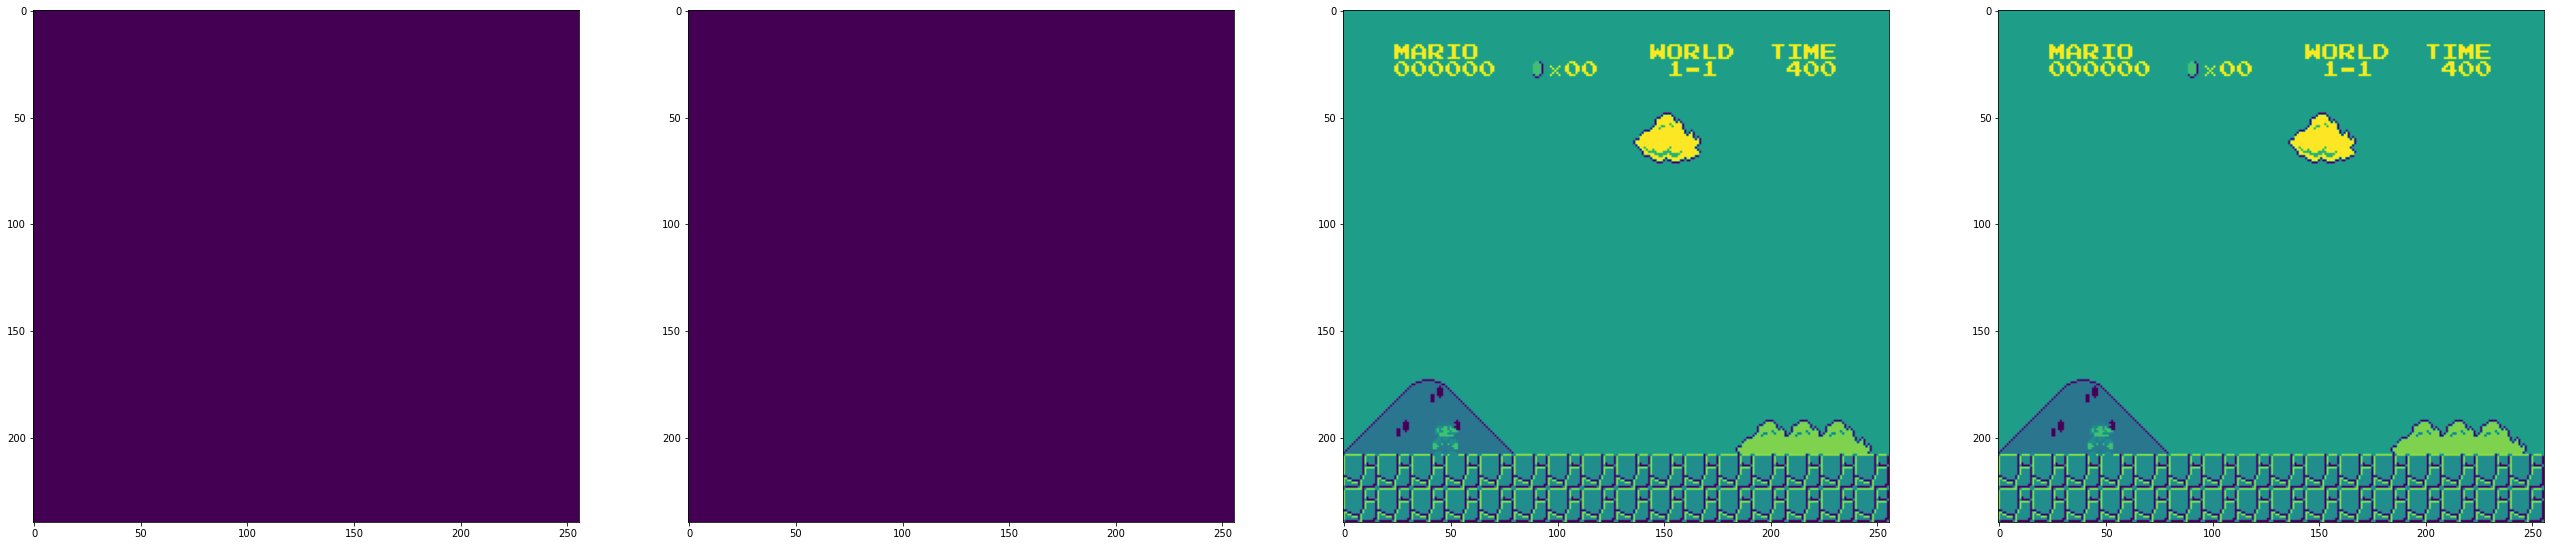

In [162]:
# plt.imshow(state[0])
plt.figure(figsize=(45,30))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# Training the model 